In [1]:
# script to plot TTS for all UT segments 
# date created: 3/3/2020
# author: sofia chelpon

In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [4]:
############ --------------- LOAD CAMPAVGBL --------------- ###########
utbl_campavgbl = pd.read_pickle('./campavgbl/utbl_allseg_campavgbl.pkl')
mustar_campavgbl = pd.read_pickle('./campavgbl/mustar_allseg_campavgbl.pkl')
tau_campavgbl = pd.read_pickle('./campavgbl/tau_allseg_campavgbl.pkl')
t_campavgbl = pd.read_pickle('./campavgbl/t_allseg_campavgbl.pkl')
gf_campavgbl = pd.read_pickle('./campavgbl/gf_allseg_campavgbl.pkl')
seg_campavgbl = pd.read_pickle('./campavgbl/segment_info_campavgbl.pkl')

In [6]:
############ --------------- LOAD SAMEFLIGHTBL --------------- ###########
utbl_sameflightbl = pd.read_pickle('./sameflightbl/utbl_allseg_sameflightbl.pkl')
mustar_sameflightbl = pd.read_pickle('./sameflightbl/mustar_allseg_sameflightbl.pkl')
tau_sameflightbl = pd.read_pickle('./sameflightbl/tau_allseg_sameflightbl.pkl')
t_sameflightbl = pd.read_pickle('./sameflightbl/t_allseg_sameflightbl.pkl')
gf_sameflightbl = pd.read_pickle('./sameflightbl/gf_allseg_sameflightbl.pkl')
seg_sameflightbl = pd.read_pickle('./sameflightbl/segment_info_sameflightbl.pkl')

In [8]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_campavgbl['r squared'] >= 0.65))
seg_campavgbl_screened = seg_campavgbl.iloc[high_r2_idx]

# screen vars 
mustar_campavgbl_screened = mustar_campavgbl[high_r2_idx]
utbl_campavgbl_screened = utbl_campavgbl[high_r2_idx]
tau_campavgbl_screened = tau_campavgbl[high_r2_idx]

gf_campavgbl_screened = gf_campavgbl[high_r2_idx]
t_campavgbl_screened = t_campavgbl[high_r2_idx]

In [9]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx_f = np.ndarray.flatten(np.argwhere(seg_sameflightbl['r squared'] >= 0.65))
seg_sameflightbl_screened = seg_sameflightbl.iloc[high_r2_idx_f]

# screen vars 
mustar_sameflightbl_screened = mustar_sameflightbl[high_r2_idx_f]
utbl_sameflightbl_screened = utbl_sameflightbl[high_r2_idx_f]
tau_sameflightbl_screened = tau_sameflightbl[high_r2_idx_f]

gf_sameflightbl_screened = gf_sameflightbl[high_r2_idx_f]
t_sameflightbl_screened = t_sameflightbl[high_r2_idx_f]

In [201]:
###########################################################################################
###########################################################################################
###########################################################################################

In [23]:
# count number of values in utbl used for fit 
count_utbl_sameflightbl = np.isfinite(utbl_sameflightbl).sum()
seg_sameflightbl['data pts'] = count_utbl_sameflightbl

count_utbl_campavgbl = np.isfinite(utbl_campavgbl).sum()
seg_campavgbl['data pts'] = count_utbl_campavgbl


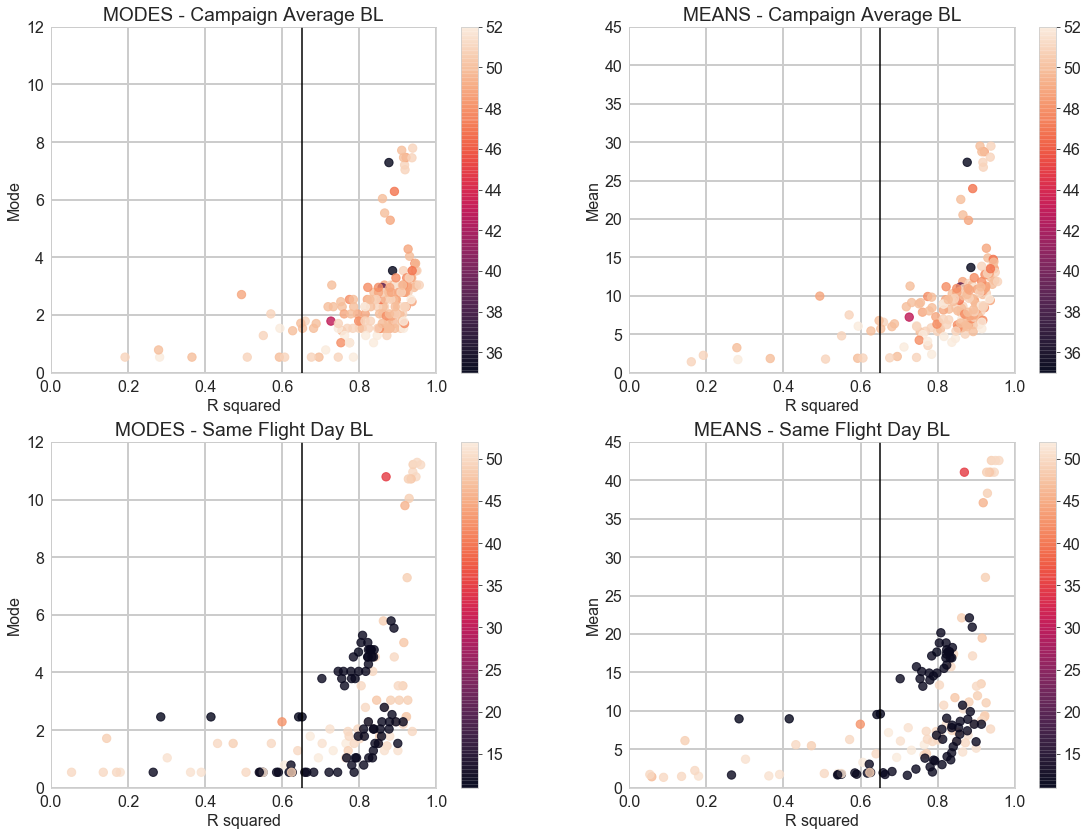

In [162]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(figsize=(19, 14), ncols=2, nrows=2)
a = 0.8
sz = 70
## modes - campavgbl
splt = axes[0,0].scatter(seg_campavgbl['r squared'], seg_campavgbl['mode age'], 
                  c = seg_campavgbl['data pts'], s = sz, alpha = a)
fig.colorbar(splt, ax = axes[0,0])
axes[0,0].set_title  ('MODES - Campaign Average BL')
axes[0,0].set_xlabel('R squared')
axes[0,0].set_ylabel('Mode')
axes[0,0].set_ylim([0, 12])
axes[0,0].set_xlim([0, 1])
axes[0,0].plot([0.65, 0.65], [0, 15], color = 'k')
axes[0,0].grid(which='major', linewidth=2)

## means - campavgbl
splt2 = axes[0,1].scatter(seg_campavgbl['r squared'], seg_campavgbl['mean age'], 
                  c = seg_campavgbl['data pts'], s = sz, alpha = a)
fig.colorbar(splt2, ax = axes[0,1])
axes[0,1].set_title  ('MEANS - Campaign Average BL')
axes[0,1].set_xlabel('R squared')
axes[0,1].set_ylabel('Mean')
axes[0,1].set_ylim([0, 45])
axes[0,1].set_xlim([0, 1])
axes[0,1].plot([0.65, 0.65], [0, 50], color = 'k')
axes[0,1].grid(which='major', linewidth=2)

## ------------------------------------------------------------------------------------------
pos_md = np.where(seg_sameflightbl['mode age'] > 0)
modes = seg_sameflightbl['mode age'].values

pos_mn = np.where(seg_sameflightbl['mean age'] > 0)
means = seg_sameflightbl['mean age'].values

rsq = seg_sameflightbl['r squared'].values
datapts = seg_sameflightbl['data pts'].values

## modes - sameflightbl 
splt2 = axes[1,0].scatter(rsq[pos_md], modes[pos_md], 
                  c = datapts[pos_md], s = sz, alpha = a)
fig.colorbar(splt2, ax = axes[1,0])
axes[1,0].set_title  ('MODES - Same Flight Day BL')
axes[1,0].set_xlabel('R squared')
axes[1,0].set_ylabel('Mode')
axes[1,0].set_ylim([0, 12])
axes[1,0].set_xlim([0, 1])
axes[1,0].plot([0.65, 0.65], [0, 15], color = 'k')
axes[1,0].grid(which='major', linewidth=2)

## means - sameflightbl 
splt2 = axes[1,1].scatter(rsq[pos_mn], means[pos_mn], 
                  c = datapts[pos_mn], s = sz, alpha = a)
fig.colorbar(splt2, ax = axes[1,1])
axes[1,1].set_title('MEANS - Same Flight Day BL')
axes[1,1].set_xlabel('R squared')
axes[1,1].set_ylabel('Mean')
axes[1,1].set_ylim([0, 45])
axes[1,1].set_xlim([0, 1])
axes[1,1].plot([0.65, 0.65], [0, 50], color = 'k')
axes[1,1].grid(which='major', linewidth=2)

fig.savefig('./meanmode_to_r2.png')  

In [145]:
###########################################################################################
###########################################################################################
###########################################################################################


In [151]:
longest = np.where(seg_sameflightbl['mean age'] > 30)
seg_sameflightbl.loc[longest]

,Time_UTC,Flight,r squared,mean age,mode age,data pts
26,2014-01-25 01:46:13,RF06,0.929091,38.317901,10.039063,49
27,2014-01-25 01:54:13,RF06,0.869287,41.054894,10.789063,35
28,2014-01-25 02:02:13,RF06,0.918150,37.081840,9.789063,46
29,2014-01-25 02:10:14,RF06,0.946853,41.054894,10.789063,50
30,2014-01-25 02:18:14,RF06,0.938684,41.054894,10.955122,50
31,2014-01-25 02:26:15,RF06,0.939277,42.575446,11.214449,49
32,2014-01-25 02:34:15,RF06,0.934297,41.054894,10.714449,48
33,2014-01-25 02:42:15,RF06,0.927063,41.054894,10.714449,49
34,2014-01-25 02:50:16,RF06,0.949881,42.575446,11.289063,50
35,2014-01-25 02:58:16,RF06,0.959034,42.575446,11.205122,50


In [ ]:
###########################################################################################
###########################################################################################
###########################################################################################

1.4195021967862864

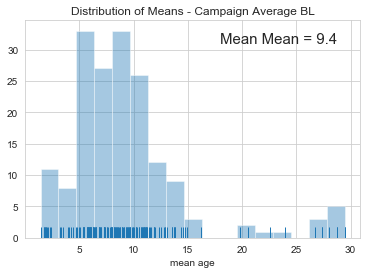

In [132]:
sns.set_style("whitegrid")
ax = sns.distplot(seg_campavgbl['mean age'], kde = False, rug = True)
ax.set_title('Distribution of Means - Campaign Average BL')
my_MEAN = 'Mean Mean = ' + np.str(np.round(seg_campavgbl['mean age'].mean(), 2))
ax.text(18, 31, my_MEAN, fontsize = 15)
np.min(seg_campavgbl['mean age'])

Text(5, 40, 'Mean Mode = 2.49')

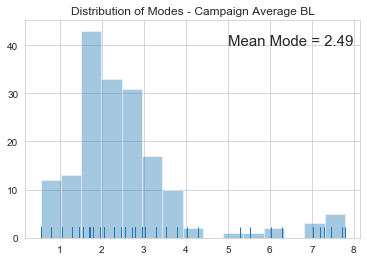

In [133]:
pos = np.where(seg_campavgbl['mode age'] > 0)
modes = seg_campavgbl['mode age'].values

sns.set_style("whitegrid")
ax = sns.distplot(modes[pos], kde = False, rug=True)
ax.set_title('Distribution of Modes - Campaign Average BL')
my_MODE = 'Mean Mode = ' + np.str(np.round(modes[pos].mean(), 2))
ax.text(5, 40, my_MODE, fontsize = 15)

In [163]:
###########################################################################################
###########################################################################################
###########################################################################################

In [180]:
flightcode_campavg = []
for index, row in seg_campavgbl.iterrows():
    flight = row['Flight']
    flightcode_campavg.append(int(flight[-2:]))
seg_campavgbl['flight code'] = flightcode_campavg


flightcode_sameflight = []
for index, row in seg_sameflightbl.iterrows():
    flight = row['Flight']
    flightcode_sameflight.append(int(flight[-2:]))
seg_sameflightbl['flight code'] = flightcode_sameflight

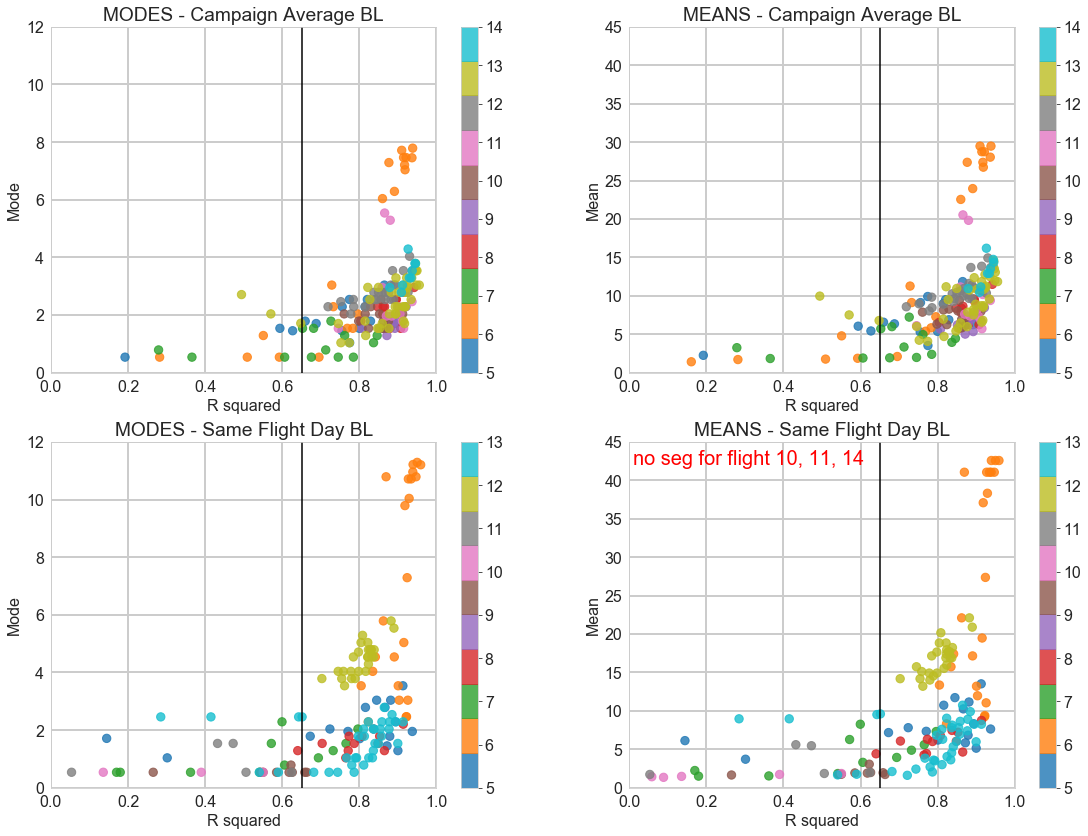

In [200]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(figsize=(19, 14), ncols=2, nrows=2)
a = 0.8
sz = 70
## modes - campavgbl
splt = axes[0,0].scatter(seg_campavgbl['r squared'], seg_campavgbl['mode age'], 
                  c = seg_campavgbl['flight code'], s = sz, alpha = a, cmap = 'tab10')
fig.colorbar(splt, ax = axes[0,0])
axes[0,0].set_title  ('MODES - Campaign Average BL')
axes[0,0].set_xlabel('R squared')
axes[0,0].set_ylabel('Mode')
axes[0,0].set_ylim([0, 12])
axes[0,0].set_xlim([0, 1])
axes[0,0].plot([0.65, 0.65], [0, 15], color = 'k')
axes[0,0].grid(which='major', linewidth=2)

## means - campavgbl
splt2 = axes[0,1].scatter(seg_campavgbl['r squared'], seg_campavgbl['mean age'], 
                  c = seg_campavgbl['flight code'], s = sz, alpha = a, cmap = 'tab10')
fig.colorbar(splt2, ax = axes[0,1])
axes[0,1].set_title  ('MEANS - Campaign Average BL')
axes[0,1].set_xlabel('R squared')
axes[0,1].set_ylabel('Mean')
axes[0,1].set_ylim([0, 45])
axes[0,1].set_xlim([0, 1])
axes[0,1].plot([0.65, 0.65], [0, 50], color = 'k')
axes[0,1].grid(which='major', linewidth=2)

## ------------------------------------------------------------------------------------------
pos_md = np.where(seg_sameflightbl['mode age'] > 0)
modes = seg_sameflightbl['mode age'].values

pos_mn = np.where(seg_sameflightbl['mean age'] > 0)
means = seg_sameflightbl['mean age'].values

rsq = seg_sameflightbl['r squared'].values
fltcode = seg_sameflightbl['flight code'].values

## modes - sameflightbl 
splt2 = axes[1,0].scatter(rsq[pos_md], modes[pos_md], 
                  c = fltcode[pos_md], s = sz, alpha = a, cmap = 'tab10', vmax = 13)
fig.colorbar(splt2, ax = axes[1,0])
axes[1,0].set_title  ('MODES - Same Flight Day BL')
axes[1,0].set_xlabel('R squared')
axes[1,0].set_ylabel('Mode')
axes[1,0].set_ylim([0, 12])
axes[1,0].set_xlim([0, 1])
axes[1,0].plot([0.65, 0.65], [0, 15], color = 'k')
axes[1,0].grid(which='major', linewidth=2)

## means - sameflightbl 
splt2 = axes[1,1].scatter(rsq[pos_mn], means[pos_mn], 
                  c = fltcode[pos_mn], s = sz, alpha = a, cmap = 'tab10', vmax = 13)
fig.colorbar(splt2, ax = axes[1,1])
axes[1,1].set_title('MEANS - Same Flight Day BL')
axes[1,1].set_xlabel('R squared')
axes[1,1].set_ylabel('Mean')
axes[1,1].set_ylim([0, 45])
axes[1,1].set_xlim([0, 1])
axes[1,1].plot([0.65, 0.65], [0, 50], color = 'k')
axes[1,1].grid(which='major', linewidth=2)
axes[1,1].text(0.01, 42, 'no seg for flight 10, 11, 14', c = 'r', fontsize = 20)

fig.savefig('./meanmode_to_r2.png')  

In [ ]:
###########################################################################################
###########################################################################################
###########################################################################################

In [202]:
print(seg_campavgbl_screened['Flight'].unique())
print(seg_sameflightbl_screened['Flight'].unique())

['RF05' 'RF06' 'RF07' 'RF08' 'RF09' 'RF10' 'RF11' 'RF12' 'RF13' 'RF14']
['RF05' 'RF06' 'RF07' 'RF08' 'RF09' 'RF12' 'RF13']


In [204]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
# look at REJECTED segments 
low_r2_idx = np.ndarray.flatten(np.argwhere(seg_campavgbl['r squared'] < 0.65))
seg_campavgbl_bad = seg_campavgbl.iloc[low_r2_idx]

# screen vars 
mustar_campavgbl_bad = mustar_campavgbl[low_r2_idx]
utbl_campavgbl_bad = utbl_campavgbl[low_r2_idx]
tau_campavgbl_bad = tau_campavgbl[low_r2_idx]

gf_campavgbl_bad = gf_campavgbl[low_r2_idx]
t_campavgbl_bad = t_campavgbl[low_r2_idx]

seg_campavgbl_bad

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


,Time_UTC,Flight,r squared,mean age,mode age,data pts,flight code
4,2014-01-22 02:29:00,RF05,-0.829456,5.872662,1.464449,49,5
7,2014-01-22 02:53:59,RF05,0.626847,5.427864,1.455122,50,5
8,2014-01-22 03:33:52,RF05,0.593846,6.050132,1.539063,52,5
11,2014-01-22 04:08:48,RF05,0.192151,2.257906,0.539063,51,5
16,2014-01-25 00:26:10,RF06,0.160986,1.419502,-999.000000,51,6
17,2014-01-25 00:34:09,RF06,0.550853,4.789320,1.289063,51,6
22,2014-01-25 01:14:11,RF06,0.592423,1.876102,0.539063,50,6
23,2014-01-25 01:22:11,RF06,0.509204,1.768500,0.539063,51,6
36,2014-01-25 05:19:56,RF06,0.281886,1.708359,0.539063,52,6
37,2014-01-25 06:10:48,RF06,-1.791383,5.936912,1.714449,49,6


In [252]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
# look at REJECTED segments 
low_r2_idx = np.ndarray.flatten(np.argwhere(seg_sameflightbl['r squared'] < 0.65))
seg_sameflightbl_bad = seg_sameflightbl.iloc[low_r2_idx]

# screen vars 
mustar_sameflightbl_bad = mustar_sameflightbl[low_r2_idx]
utbl_sameflightbl_bad = utbl_sameflightbl[low_r2_idx]
tau_sameflightbl_bad = tau_sameflightbl[low_r2_idx]

gf_sameflightbl_bad = gf_sameflightbl[low_r2_idx]
t_sameflightbl_bad = t_sameflightbl[low_r2_idx]


Text(0.5, 1.0, 'Segments with r^2 < 0.65 - Same Flight Day BL')

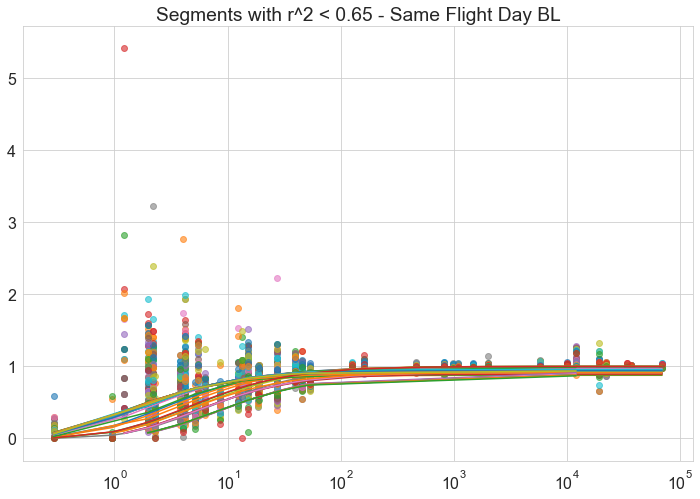

In [255]:
low_r2_idx = np.ndarray.flatten(np.argwhere(seg_sameflightbl['r squared'] < 0.65))

fig, ax = plt.subplots(figsize=(12, 8))
for ii in low_r2_idx: 
    plt.scatter(tau_sameflightbl_bad[ii], utbl_sameflightbl_bad[ii], alpha = 0.6)
    plt.plot(tau_sameflightbl_bad[ii], mustar_sameflightbl_bad[ii])
ax.set_xscale('log')
ax.set_title('Segments with r^2 < 0.65 - Same Flight Day BL')

Text(0.5, 1.0, 'Segments with r^2 < 0.65 - Campaign Average BL')

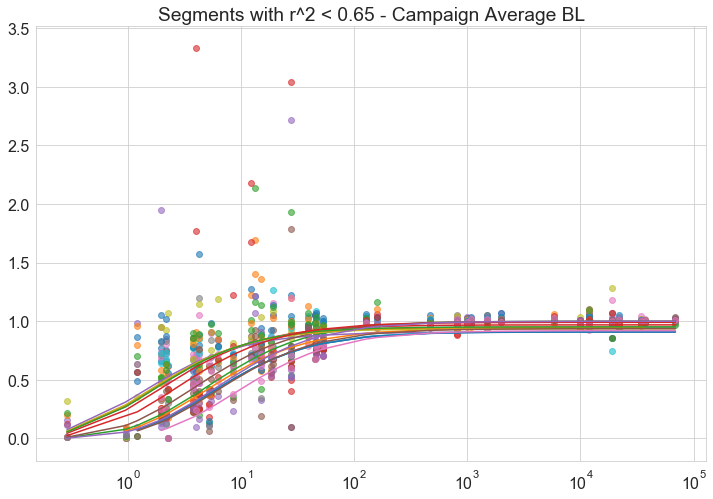

In [256]:
low_r2_idx = np.ndarray.flatten(np.argwhere(seg_campavgbl['r squared'] < 0.65))

fig, ax = plt.subplots(figsize=(12, 8))
for ii in low_r2_idx: 
    plt.scatter(tau_campavgbl_bad[ii], utbl_campavgbl_bad[ii], alpha = 0.6)
    plt.plot(tau_campavgbl_bad[ii], mustar_campavgbl_bad[ii])
ax.set_xscale('log')
ax.set_title('Segments with r^2 < 0.65 - Campaign Average BL')